In [24]:
import random
import sage.graphs.graph_plot
from sage.graphs.base.boost_graph import *
from sage.plot.point import *
import numpy
import timeit
from time import process_time
import time


In [25]:
def seznam_cen(st_opazanj, st_pov_grafa, min_cena, max_cena):
    sur_podatki = []
    for i in range(0, st_opazanj):
        mer_povezav = []
        for j in range(0, st_pov_grafa):
            mer_povezav.append(numpy.random.random_integers(min_cena, max_cena))
        sur_podatki.append(mer_povezav)
    return(sur_podatki)

#seznam_cen(1,2,0,5)
st_opazanj, st_pov_grafa, min_cena, max_cena = 1,2,0,5
execution_time = timeit.timeit('seznam_cen(st_opazanj, st_pov_grafa, min_cena, max_cena)', 'from __main__ import seznam_cen, st_opazanj, st_pov_grafa, min_cena, max_cena', number=1)
print(execution_time)

#stevilo_pov_grafa = 2 * st_vozlisc^2 - 2 * st_vozlisc

0.0002576360002422007


<ipython-input-25-9c269ae6eea0>:6: DeprecationWarning: This function is deprecated. Please call randint(0, 5 + 1) instead
  mer_povezav.append(numpy.random.random_integers(min_cena, max_cena))


In [26]:
def mnoz(vektor1, vektor2):
    matrika = []
    for i in range(0,len(vektor1)):
        vrstica =[]
        for j in range(0, len(vektor2)):
            vrstica.append(vektor1[i] * vektor2[j])
        matrika.append(vrstica)
    return(matrika)

def kov_matrika(vse_utezi):
    avr_pov = [i * 1/len(vse_utezi) for i in [sum(x) for x in zip(*vse_utezi)]]
    #zac_mat = numpy.matrix(mnoz(numpy.subtract(vse_utezi[0],avr_pov),numpy.subtract(vse_utezi[0],avr_pov)))
    zac_mat = mnoz(numpy.subtract(vse_utezi[0],avr_pov),numpy.subtract(vse_utezi[0],avr_pov))
    for i in range(1, len(vse_utezi)):
        #zac_mat += numpy.matrix(mnoz(numpy.subtract(vse_utezi[i],avr_pov),numpy.subtract(vse_utezi[i],avr_pov)))
        zac_mat = numpy.add(zac_mat, mnoz(numpy.subtract(vse_utezi[i],avr_pov),numpy.subtract(vse_utezi[i],avr_pov)))
    kon_mat = numpy.dot(1/len(vse_utezi), zac_mat)
    return(kon_mat)

In [27]:
def vektorcki_x(graf, zacetno, koncno):
    vse_poti = graf.all_paths(zacetno, koncno, use_multiedges=True, report_edges=False, labels=False)
    #vse_poti = graf.all_paths(zacetno, koncno)
    vse_povezave = graf.edges()
    par = []
    for i in range(0,len(vse_povezave)):
        par.append(vse_povezave[i][0:2])
    seznam_vektorjev = []
    for i in range(0, len(vse_poti)):
        pot = (vse_poti[i])
        prvi_oklepaj1 = list(zip(pot, pot[1:] + pot[:1]))
        prvi_oklepaj = prvi_oklepaj1[:-1]
        x=[]
        for i in range(0, len(par)):
            if par[i] in prvi_oklepaj:
                x.append(1)
            else:
                x.append(0)
        seznam_vektorjev.append(x)
    return(seznam_vektorjev)

In [28]:
def grid_graf(st_opazanj, st_vozlisc, min_cena, max_cena):
    st_pov_grafa = 2 * st_vozlisc^2 - 2 * st_vozlisc
    utezi = seznam_cen(st_opazanj, st_pov_grafa, min_cena, max_cena)
    #graf_seznam = vsa_vozlisca(st_vozlisc, st_pov_grafa)
    graf_seznam = graphs.Grid2dGraph(st_vozlisc, st_vozlisc).edges()
    nov = [] #najprej spremeniva v list
    for i in range(0,len(graf_seznam)):
        nov.append(list(graf_seznam[i]))
    konec = [] #dodava še ceno, v obliki ki jo sprjema digraph
    seznam_grafov = []
    for j in range(0,len(utezi)):
        zadnji = []
        for i in range(0,len(nov)):
            vmesni = []
            vmesni.append(nov[i][0])
            vmesni.append(nov[i][1])
            vmesni.append(utezi[j][i])
            zadnji.append(tuple(vmesni))
        konec.append(zadnji)
        gr = DiGraph(zadnji)
        seznam_grafov.append(gr)
    #seznam_gra[0].show(edge_labels = True)
    return(seznam_grafov, utezi)


In [29]:
def min_grid_graf(st_opazanj, st_vozlisc, min_cena, max_cena):
    st_pov_grafa = 2 * st_vozlisc^2 - 2 * st_vozlisc
    utezi = seznam_cen(st_opazanj, st_pov_grafa, min_cena, max_cena)
    graf_oblika = DiGraph(graphs.Grid2dGraph(st_vozlisc, st_vozlisc).edges())
    return(graf_oblika, utezi)

#[grafkec, utezi] = min_grid_graf(3, 3, 1, 100)
#grafkec.show()

In [30]:
def argmin(poti, av_pov, diagonala):
    x_min = poti[0]
    cena_pov = numpy.dot(av_pov, x_min)
    cena_d = numpy.dot(diagonala, x_min)
    cena = cena_pov + cena_d
    #cena = numpy.dot(numpy.add(av_pov, diagonala), poti[0])
    #if len(poti) == 1:
    #    return(x_min, cena_pov, cena_d, cena)
    #else:
    for i in range(1, len(poti)):
        x_nov = poti[i]
        cena_pov_nov = numpy.dot(av_pov, x_nov)
        cena_d_nov = numpy.dot(diagonala, x_nov)
        cena_nov = cena_pov_nov + cena_d_nov
        #cena_nov = numpy.dot(numpy.add(av_pov,diagonala), poti[i])
        if cena_nov < cena:
            x_min = x_nov
            cena_pov = cena_pov_nov
            cena_d = cena_d_nov
            cena = cena_nov
    return(x_min, cena_pov, cena_d, cena)

In [34]:
def arglexmin(seznam_x, vektorji):
    xmin = min(([numpy.dot(numpy.array(v), numpy.array(x)) for v in vektorji], x) for x in seznam_x)
    return xmin

In [9]:
uer = []
def razisci(x0, x1, pov, diag, poti):
    alfa_m = numpy.dot(diag,numpy.subtract(x1,x0)) / numpy.dot(numpy.subtract(pov,diag),numpy.subtract(x0,x1))
    v_alfa = numpy.dot(alfa_m, pov)
    v_1alfa = numpy.dot((1-alfa_m), diag)
    vek_zv = numpy.add(v_alfa, v_1alfa)
    #vek_brez_alfa = numpy.add(diag, pov)
    x_zv = argmin(poti, v_alfa, v_1alfa)
    stara_najboljsa = argmin([x0], numpy.dot(alfa_m, pov), numpy.dot((1-alfa_m), diag))[3]
    if x_zv[3] < stara_najboljsa:
        print("Dodali smo novo uč. eks. reš.")
        uer.append(x_zv[0])
        #print(prvi_vektor)
        print("vr. nove uer", x_zv[3])
        print("vr stare uer", stara_najboljsa)
        if -x_zv[3] + stara_najboljsa > 0.01:
            razisci(x0, x_zv[0], pov, diag, poti)
            razisci(x_zv[0], x1, pov, diag, poti)
        else:
            print("Razlika je minimalna. Koncamo.")
    else:
        print("Ne najdemo izboljsanja. Koncamo.")
        #uer.append(argmin([x0, x1], pov, diag)[0])
    return(uer)

#def naivni_alg (x0, x1, pov, diag, poti):
#    #uer =[]
#    razisci(x0, x1, pov, diag, poti)
#    return(uer)

#razisci(xln, xrn, povprecje_w, diagonalci, xi)

In [32]:
#boljša praksa, najde pravo stevilo uer, vendar izpise vse
#k = [0]
def razisci1(x0, x1, pov, diag, poti, s):
    alfa_m = numpy.dot(diag,numpy.subtract(x1,x0)) / numpy.dot(numpy.subtract(pov,diag),numpy.subtract(x0,x1))
    v_alfa = numpy.dot(alfa_m, pov)
    v_1alfa = numpy.dot((1-alfa_m), diag)
    vek_zv = numpy.add(v_alfa, v_1alfa)
    x_zv = argmin(poti, v_alfa, v_1alfa)
    k[0] += 1
    stara_najboljsa = argmin([x0], numpy.dot(alfa_m, pov), numpy.dot((1-alfa_m), diag))[3]
    if x_zv[3] < stara_najboljsa:
        print("Dodali smo novo uč. eks. reš.")

        s.append(x_zv[0])
        if -x_zv[3] + stara_najboljsa > 0.01:
            print("Razlika dovolj velika")
            razisci1(x0, x_zv[0], pov, diag, poti, s)
            razisci1(x_zv[0], x1, pov, diag, poti, s)
        else:
            print("Razlika je minimalna. Koncamo.")
    else:
        print("Ne najdemo izboljsanja. Koncamo.")
    return(s, k[0])


#start_time = time.time()
#print("--- %s seconds ---" % (time.time() - start_time))


#razisci1(xln, xrn, povprecje_w, diagonalci, xi, [])

#print(timeit.timeit(razisci1(x0, x1, pov, diag, poti, s, k), number = 5))


#x0, x1, pov, diag, poti, s, k = xln, xrn, povprecje_w, diagonalci, xi, [], 0
#execution_time = timeit.timeit(razisci1(x0, x1, pov, diag, poti, s, k), 'from __main__ import x0, x1, pov, diag, poti, s, k', number=1)
#print(execution_time)



In [18]:
start_time = time.time()
print(start_time)
#razisci1(xln, xrn, povprecje_w, diagonalci, xi, [])
cas = ("--- %s seconds ---" % (time.time() - start_time))
print(cas)

1607731303.0117657


Dodali smo novo uč. eks. reš.
Razlika dovolj velika


Dodali smo novo uč. eks. reš.
Razlika dovolj velika


Dodali smo novo uč. eks. reš.
Razlika je minimalna. Koncamo.


Dodali smo novo uč. eks. reš.
Razlika je minimalna. Koncamo.


Dodali smo novo uč. eks. reš.
Razlika dovolj velika


Ne najdemo izboljsanja. Koncamo.


Dodali smo novo uč. eks. reš.
Razlika dovolj velika


Dodali smo novo uč. eks. reš.
Razlika dovolj velika


Ne najdemo izboljsanja. Koncamo.


Ne najdemo izboljsanja. Koncamo.


Ne najdemo izboljsanja. Koncamo.


In [36]:
#st_opazanj, st_vozlisc, min_cena, max_cena = 50, 5, 0, 100
#s = razisci1(xln, xrn, povprecje_w, diagonalci, xi, [])

#cas = []
#for i in range(2):
[grafi, weights] = min_grid_graf(50, 3, 1, 100)
diagonalci = numpy.diag(kov_matrika(weights))
povprecje_w = [i * 1/len(weights) for i in [sum(x) for x in zip(*weights)]]
xi = vektorcki_x(grafi, (0, 0), (2, 2))
xl = arglexmin(xi, [povprecje_w, diagonalci])
xln = xl[1]
xr = arglexmin(xi, [diagonalci, povprecje_w])
xrn = xr[1]
k = [0]
start_time = time.time()
razisci1(xln, xrn, povprecje_w, diagonalci, xi, [])
celoten_cas = (time.time() - start_time)
print("1. končano")
with open('naivni.json', 'w') as f:
    f.write(str(k))
    f.write(str(celoten_cas)



#with open('naivni.json', 'w') as f:
#    f.write(s)

#st_opazanj, st_vozlisc, min_cena, max_cena = 50, 5, 0, 100
#x0, x1, pov, diag, poti, s = xln, xrn, povprecje_w, diagonalci, xi, []

#with open("graf_{}_{}_{}_{}.json".format(st_opazanj, st_vozlisc, min_cena, max_cena)) as f:
 #   st_opazanj = json.load(f)
#vektor_xl = numpy.array(vektor_xl)
#vektor_xr = numpy.array(vektor_xr)

SyntaxError: unexpected EOF while parsing (<ipython-input-36-292c853a73ec>, line 34)

In [22]:
#[grafi, weights] = grid_graf(50, 9, 1, 100)
#weights = grid_graf(50, 9, 1, 100)[1]
[grafi, weights] = min_grid_graf(50, 9, 1, 100)
#DO xi DELA MAX ZA 9x9 GRID GRAFE, SICER ZMANJKA SPOMINA
#g = grafi[0]
#g.show(edge_labels = True)
povprecje_w = [i * 1/len(weights) for i in [sum(x) for x in zip(*weights)]]
#print(povprecje_w)
#print(kov_matrika(weights))
diagonalci = numpy.diag(kov_matrika(weights))
#print(diagonalci)
#xi = vektorcki_x(g, (0, 0), (8, 8))
#graphs.Grid2dGraph(st_vozlisc, st_vozlisc).edges()
xi = vektorcki_x(grafi, (0, 0), (8, 8))
#print(weights)
#print(xi)
print(len(xi))
#print("dolzina xi je", len(xi))

xl = arglexmin(xi, [povprecje_w, diagonalci])
xln = xl[1]
#print("xl in njegove vr", xl)
#print(xln)
xr = arglexmin(xi, [diagonalci, povprecje_w])
xrn = xr[1]
#print("xr in njegove vr", xr)
#print(xrn)
print(xln == xrn)



<ipython-input-2-9c269ae6eea0>:6: DeprecationWarning: This function is deprecated. Please call randint(1, 100 + 1) instead
  mer_povezav.append(numpy.random.random_integers(min_cena, max_cena))


12870


False


In [51]:
#Izpišimo rezultate
import json

stetja = []
casi = []
for i in range(10):
    [grafi, weights] = min_grid_graf(50, 9, 1, 100)
    povprecje_w = [i * 1/len(weights) for i in [sum(x) for x in zip(*weights)]]
    diagonalci = numpy.diag(kov_matrika(weights))
    xi = vektorcki_x(grafi, (0, 0), (8, 8))
    xl = arglexmin(xi, [povprecje_w, diagonalci])
    xln = xl[1]
    xr = arglexmin(xi, [diagonalci, povprecje_w])
    xrn = xr[1]
    k = [0]
    start_time = time.time()
    razisci1(xln, xrn, povprecje_w, diagonalci, xi, [])
    celoten_cas = (time.time() - start_time)
    print("1. končano")
    casi.append(celoten_cas)
    stetja.append(k[0])
with open("rezultati_naivni.json", 'w') as f:
    #with open('naivni.json', 'w') as f:
    f.write(str(stetja))
    f.write(',')
    f.write(str(casi))

<ipython-input-25-9c269ae6eea0>:6: DeprecationWarning: This function is deprecated. Please call randint(1, 100 + 1) instead
  mer_povezav.append(numpy.random.random_integers(min_cena, max_cena))


Dodali smo novo uč. eks. reš.
Razlika dovolj velika


Dodali smo novo uč. eks. reš.
Razlika dovolj velika


Dodali smo novo uč. eks. reš.
Razlika je minimalna. Koncamo.


Ne najdemo izboljsanja. Koncamo.


Dodali smo novo uč. eks. reš.
Razlika dovolj velika


Dodali smo novo uč. eks. reš.
Razlika je minimalna. Koncamo.


Dodali smo novo uč. eks. reš.
Razlika dovolj velika


Ne najdemo izboljsanja. Koncamo.


Ne najdemo izboljsanja. Koncamo.
1. končano


Dodali smo novo uč. eks. reš.
Razlika dovolj velika


Dodali smo novo uč. eks. reš.
Razlika dovolj velika


Dodali smo novo uč. eks. reš.
Razlika je minimalna. Koncamo.


Dodali smo novo uč. eks. reš.
Razlika dovolj velika


Dodali smo novo uč. eks. reš.
Razlika je minimalna. Koncamo.


Ne najdemo izboljsanja. Koncamo.


Dodali smo novo uč. eks. reš.
Razlika dovolj velika


Ne najdemo izboljsanja. Koncamo.


Ne najdemo izboljsanja. Koncamo.
1. končano


Dodali smo novo uč. eks. reš.
Razlika dovolj velika


Dodali smo novo uč. eks. reš.
Razlika dovolj velika


Dodali smo novo uč. eks. reš.
Razlika dovolj velika


Dodali smo novo uč. eks. reš.
Razlika je minimalna. Koncamo.


Ne najdemo izboljsanja. Koncamo.


Dodali smo novo uč. eks. reš.
Razlika je minimalna. Koncamo.


Dodali smo novo uč. eks. reš.
Razlika dovolj velika


Dodali smo novo uč. eks. reš.
Razlika dovolj velika


Ne najdemo izboljsanja. Koncamo.


Ne najdemo izboljsanja. Koncamo.


Ne najdemo izboljsanja. Koncamo.
1. končano


Dodali smo novo uč. eks. reš.
Razlika dovolj velika


Dodali smo novo uč. eks. reš.
Razlika dovolj velika


Ne najdemo izboljsanja. Koncamo.


Dodali smo novo uč. eks. reš.
Razlika je minimalna. Koncamo.


Dodali smo novo uč. eks. reš.
Razlika dovolj velika


Ne najdemo izboljsanja. Koncamo.


Ne najdemo izboljsanja. Koncamo.
1. končano


In [15]:
#potkice = vektorcki_x(DiGraph(graphs.Grid2dGraph(3, 3).edges()), (0, 0), (2, 2))
#len(potkice)


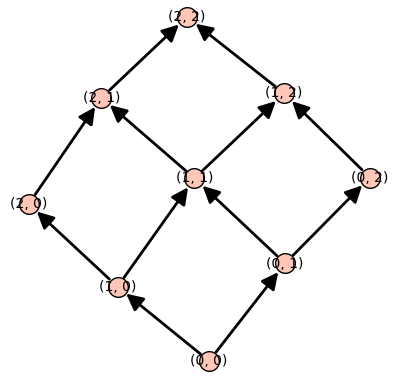

In [16]:
DiGraph(graphs.Grid2dGraph(3, 3).edges()).show()